In [1]:
install.packages("mrgsolve")
library(mrgsolve)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppArmadillo’




In [2]:
#1-コンパートメントモデル経口投与
code<-" 
$PARAM
Ke = 0.15, Vd = 10, Ka = 0.8
$INIT
Xa=10, X=0
$ODE
dxdt_Xa = -Ka*Xa;
dxdt_X = Ka*Xa - Ke*X;
$CAPTURE
C = X/Vd; "

Building oral ... 
done.



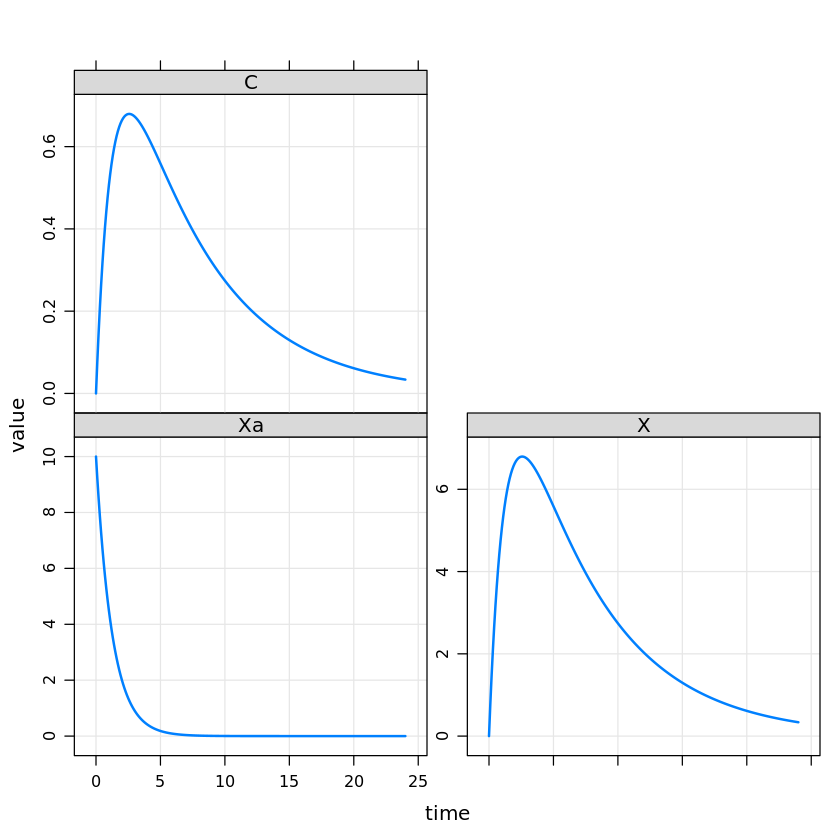

In [3]:
#グラフを描く
mod<-mcode("oral", code) %>% update(end = 24, delta = 0.1)
mod %>% mrgsim %>% plot

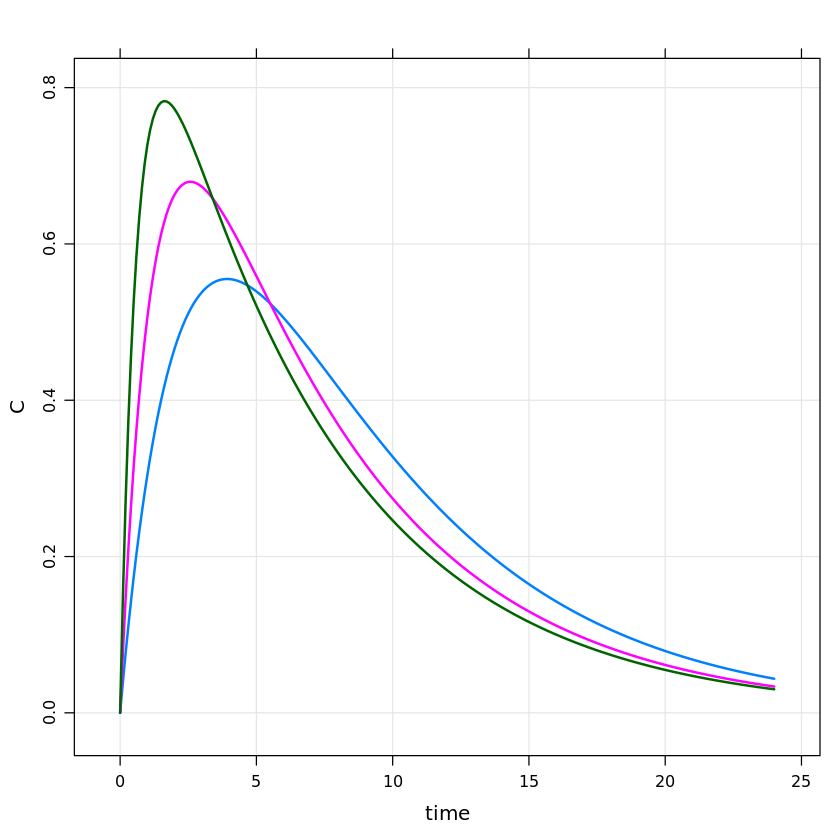

In [4]:
#Kaを変化させてみる
idata <- expand.idata(Ka = c(0.4, 0.8, 1.6))
out <- 
  mod %>% 
  idata_set(idata) %>% 
  mrgsim(end=24)
plot(out, C~time)

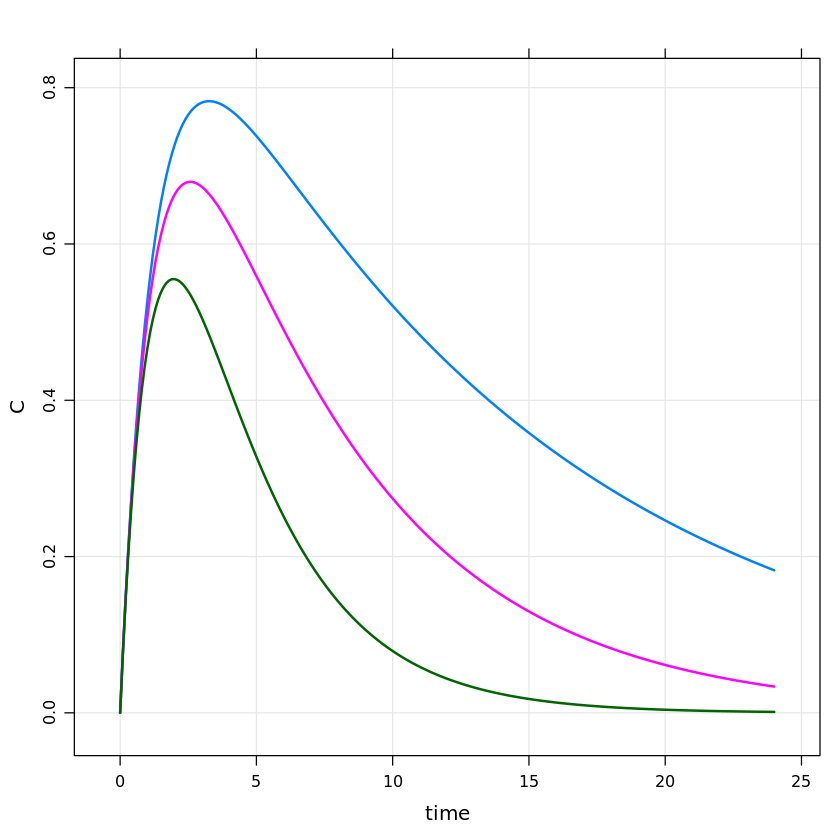

In [5]:
#Keを変化させてみる
idatake <- expand.idata(Ke = c(0.075, 0.15, 0.3))
out <- 
  mod %>% 
  idata_set(idatake) %>% 
  mrgsim(end=24)
plot(out, C~time)

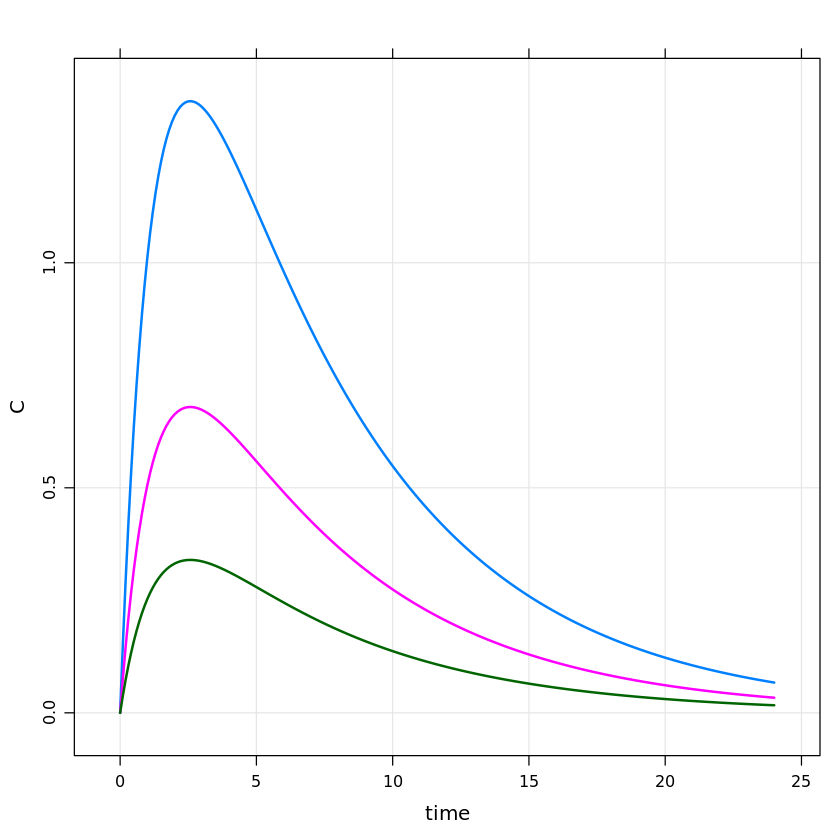

In [6]:
#Vdを変化させてみる
idatavd <- expand.idata(Vd = c(5, 10, 20))
out <- 
  mod %>% 
  idata_set(idatavd) %>% 
  mrgsim(end=24)
plot(out, C~time)

In [11]:
#1-コンパートメントモデル経口投与　血中濃度を対数
code2<-" 
$PARAM
Ke = 0.15, Vd = 10, Ka = 0.8
$INIT
Xa=10, X=0
$ODE
dxdt_Xa = -Ka*Xa;
dxdt_X = Ka*Xa - Ke*X;
$CAPTURE
lnC = log(X/Vd); "

Building oral2 ... 
done.



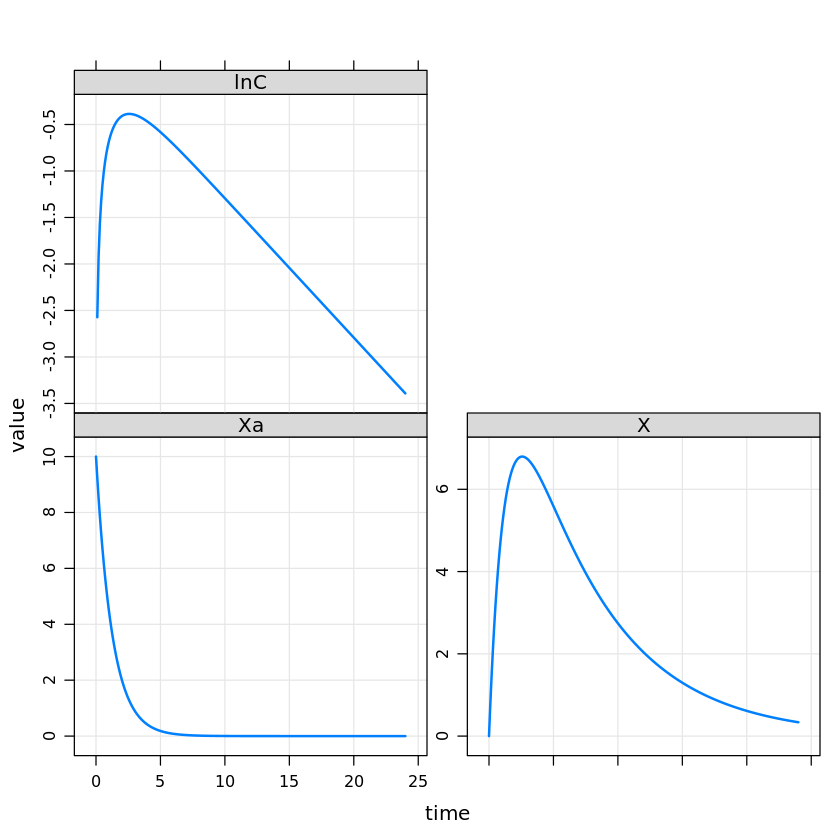

In [12]:
#グラフを描く
mod2<-mcode("oral2", code2) %>% update(end = 24, delta = 0.1)
mod2 %>% mrgsim %>% plot

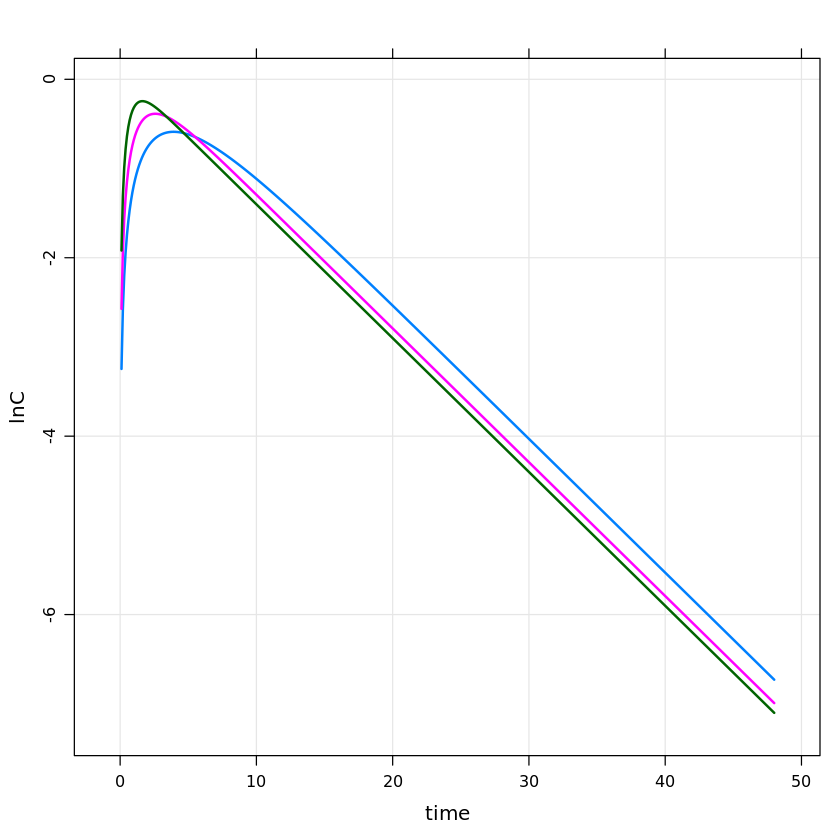

In [13]:
#Kaを変化させてみる　時間を48時間まで
idata <- expand.idata(Ka = c(0.4, 0.8, 1.6))
out <- 
  mod2 %>% 
  idata_set(idata) %>% 
  mrgsim(end=48)
plot(out, lnC~time)

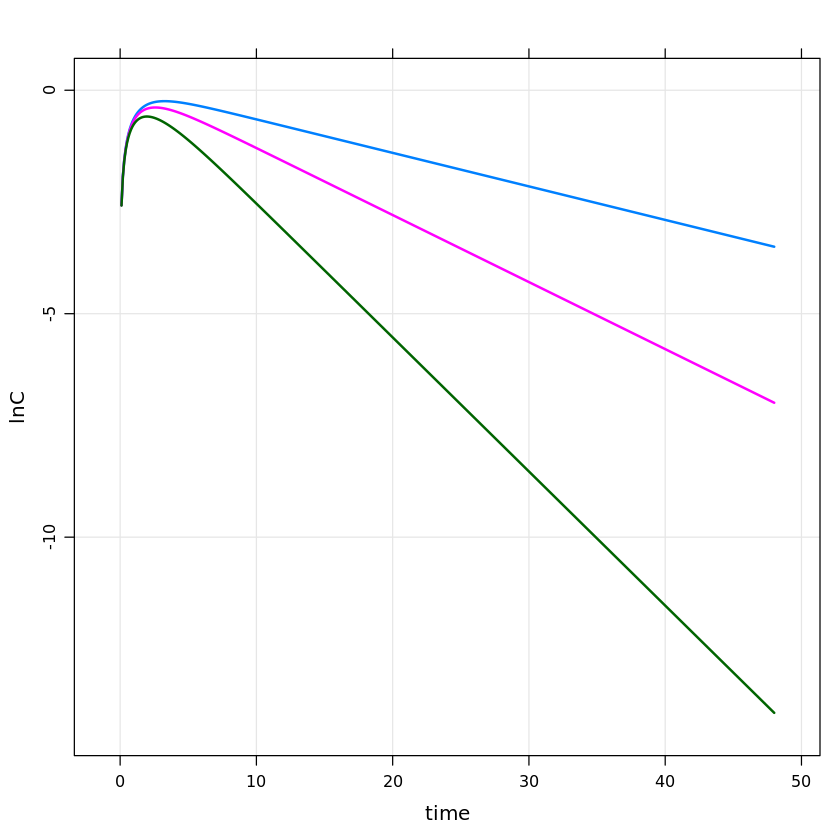

In [14]:
#Keを変化させてみる　時間を48時間まで
idatake <- expand.idata(Ke = c(0.075, 0.15, 0.3))
out <- 
  mod2 %>% 
  idata_set(idatake) %>% 
  mrgsim(end=48)
plot(out, lnC~time)

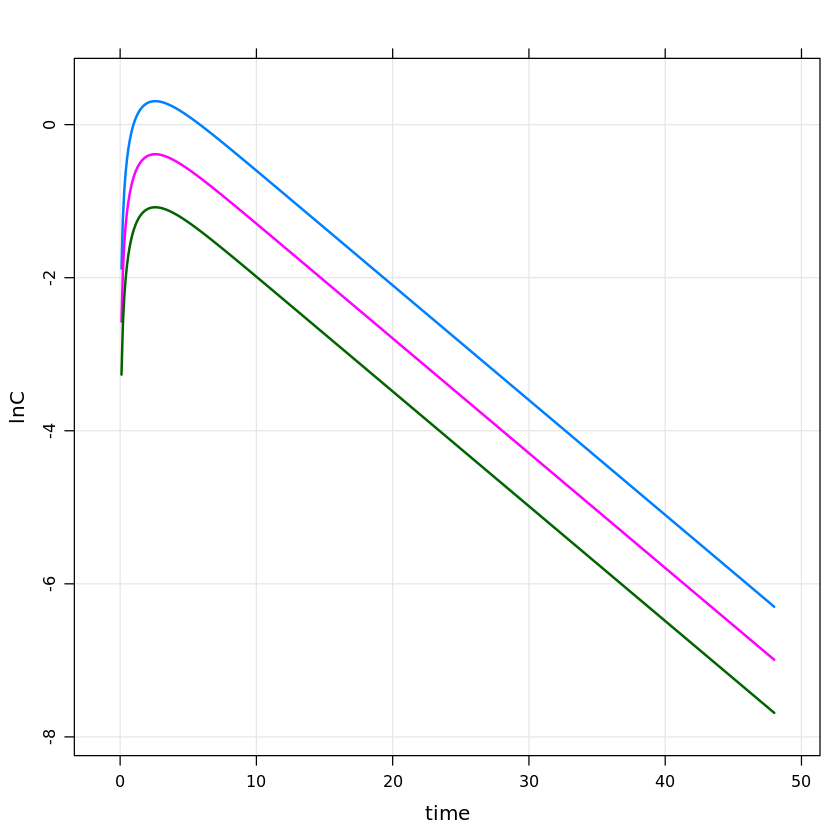

In [15]:
#Vdを変化させてみる　時間を48時間まで
idatavd <- expand.idata(Vd= c(5, 10, 20))
out <- 
  mod2 %>% 
  idata_set(idatavd) %>% 
  mrgsim(end=48)
plot(out, lnC~time)

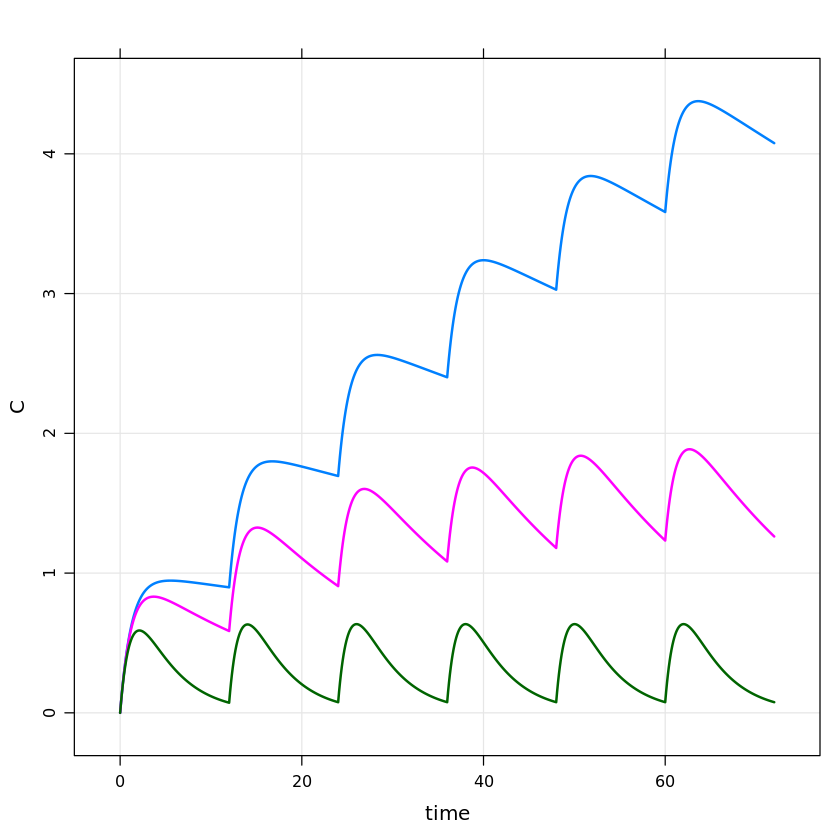

In [19]:
#Keが異なる患者へ12時間ごと10 mg繰り返し投与3日間
idatake <- expand.idata(Ke = c(0.01, 0.05, 0.25))
mod %>% init(Xa=0) %>%
  ev_rx("10 q 12 x 6") %>%
  idata_set(idatake) %>% 
  mrgsim(end = 72, delta = 0.1) %>% 
  plot(C~time)

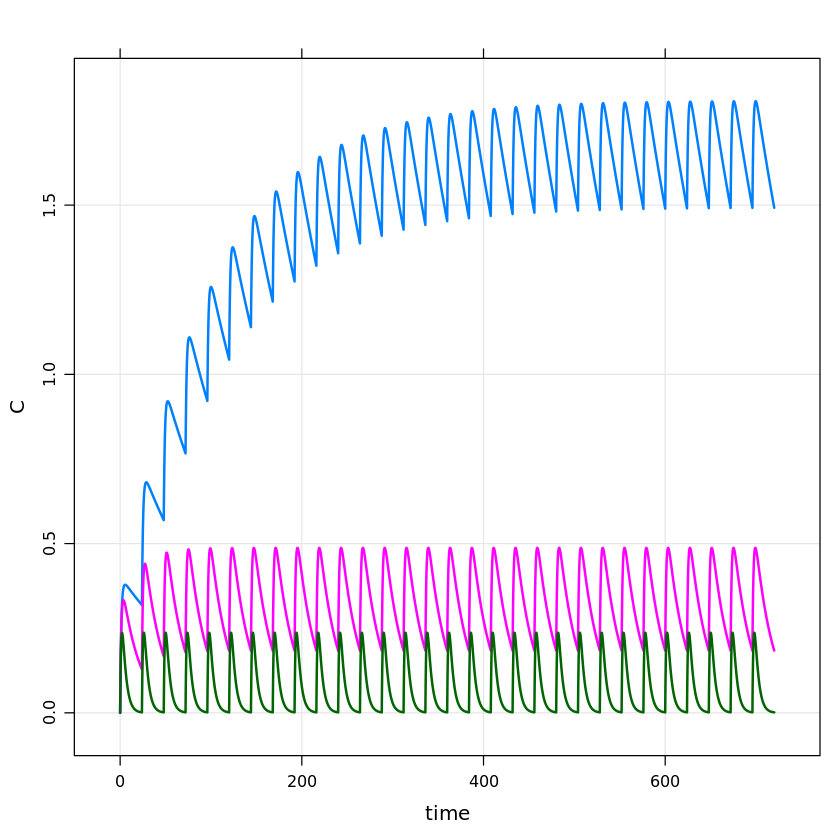

In [17]:
#Keが異なる患者へ24時間ごと4 mg繰り返し投与30日間
idatake <- expand.idata(Ke = c(0.01, 0.05, 0.25))
mod %>% init(Xa=0) %>%
  ev_rx("4 q 24 x 30") %>%
  idata_set(idatake) %>% 
  mrgsim(end = 720, delta = 0.1) %>% 
  plot(C~time)